# 局部线性嵌入(Lcally Linear Embedding, LLE)

## 符号定义

|符号|含义|
|:-:|:-:|
|$\pmb{x}$|样本点|
|$X_i$|样本点$\pmb{x_i}$的k近邻点集合|
|$N$|总样本数|
|$N_i$|样本点$\pmb{x_i}$的k近邻点集合的样本总数|
|$\pmb{X_i^{(j)}}$|样本点$\pmb{x_i}$的k近邻点集合中的第j个样本点|
|$\pmb{w}$|线性组合的权重向量|
|$\pmb{y}$|样本点降维后坐标|

## 概念

LLE属于流形学习。流形学习假设所有数据点分布在嵌入于外维欧式空间的一个潜在的流形体上。LLE的核心思想是：流形在局部领域上是线性的，即任意一个点都可以由其周围的点在最小二乘意义下进行线性表示；降维后，任意一个点依然可以由其周围的点在最小二乘意义下进行线性表示，并且线性表示的系数不变。

## 原理

由于LLE假设局部是线性的，因此对于数据点$\pmb{x}$，其可以由其k-近邻数据点的线性组合进行表示

$$
\begin{equation}
    \pmb{x_i} = \sum_{j=1}^{N_i}w_j\pmb{x_j}
\end{equation}
$$

由于LLE假设降维后依然可以用相同的系数对数据点$\pmb{x}$进行表示，所以有

$$
\begin{equation}
    \pmb{y_i} = \sum_{j=1}^{N_i}w_j\pmb{y_j}
\end{equation}
$$

由上分析可以发现LLE有三步：
* 第一步为求得任意数据点$\pmb{x}$的k-近邻数据点集合；
* 第二步为求得任意数据点$\pmb{x}$的k-近邻数据点线性表示，并得到对应的权重向量$\pmb{w}$；
* 第三步为求得符合权重向量$\pmb{w}$的低维表示

## 推导

### 线性组合权重系数求解

对于线性表示的权重系数有如下的损失函数

$$
\begin{equation}
    \mathcal{L} = \sum_{i=1}^N||\pmb{x_i}-\sum_{j=1}^{N_i}w_{ij}\pmb{X_i^{(j)}}||_2^2, s.t. \sum_{j=1}^{N_i}w_{ij}=1
\end{equation}
$$

最佳的权重系数显然是上述的损失最小，即$\arg\min\limits_{W}\mathcal{L}$，其中$W$为由所有样本点的权重系数组成的矩阵

有
$$
\begin{equation}
   \begin{split}
   \arg\min\limits_{W}\mathcal{L} &=  \arg\min\limits_{W}\sum_{i=1}^N||\pmb{x_i}-\sum_{j=1}^{N_i}w_{ij}\pmb{X_i^{(j)}}||_2^2 \\
   &= \arg\min\limits_{W}\sum_{i=1}^N||\sum_{j=1}^{N_i}(\pmb{x_i}-\pmb{X_i^{(j)}})w_{ij}||_2^2 \\
   &= \arg\min\limits_{W}\sum_{i=1}^N||([\underbrace{\pmb{x_i},\pmb{x_i}, \cdots, \pmb{x_i}}_{N_i}]-X_i)\pmb{w_i}||_2^2 \\
   &= \arg\min\limits_{W}\sum_{i=1}^N\pmb{w_i}^T([\underbrace{\pmb{x_i},\pmb{x_i}, \cdots, \pmb{x_i}}_{N_i}]-X_i)^T([\underbrace{\pmb{x_i},\pmb{x_i}, \cdots, \pmb{x_i}}_{N_i}]-X_i)\pmb{w_i}
   \end{split}, s.t. \sum_{j=1}^{N_i}w_{ij}=\pmb{w_i}^T[1, 1, \cdots, 1]_k^T = 1
\end{equation}
$$

即求解如下存在约束的优化问题
$$
\begin{equation}
    \left\{
    \begin{split}
    & \min\mathcal{L}, \\
    & s.t. \pmb{w_i}^T[1, 1, \cdots, 1]_k^T - 1 = 0
    \end{split}
    \right . 
\end{equation}
$$

考虑运用拉格朗日乘子法
即
$$
\begin{equation}
    \left\{
    \begin{split}
    &\frac{\partial{\mathcal{L}}}{\partial{\pmb{w_i}}}-\lambda\frac{\partial{(\pmb{w_i}^T[1, 1, \cdots, 1]_k^T - 1)}}{\partial{\pmb{w_i}}} = \pmb{0} \\
    & \pmb{w_i}^T[1, 1, \cdots, 1]_k^T - 1 = 0
    \end{split}
    \right .
\end{equation}
$$

记$S_i=([\underbrace{\pmb{x_i},\pmb{x_i}, \cdots, \pmb{x_i}}_{N_i}]-X_i)^T([\underbrace{\pmb{x_i},\pmb{x_i}, \cdots, \pmb{x_i}}_{N_i}]-X_i)$

同时记$\pmb{1_k} = [1, 1, \cdots, 1]_k^T$

得到
$$
\begin{equation}
    \begin{split}
        &2S_i\pmb{w_i} - \lambda\pmb{1_k} = 0\\
        \Rightarrow &\pmb{w_i} = \frac{1}{2}S_i^{-1}\lambda\pmb{1_k}
    \end{split}
\end{equation}
$$

又因为$\pmb{w_i}^T\pmb{1_k} - 1 = 0$

可以得到
$$
\begin{equation}
    \begin{split}
        & \pmb{1_k}^T \frac{1}{2}S_k^{-1}\lambda\pmb{1_k} = 1 \\
        \Rightarrow &\lambda = \frac{1}{\pmb{1_k}^T \frac{1}{2}S_i^{-1}\pmb{1_k}}
    \end{split}
\end{equation}
$$

所以得到

$$
\begin{equation}
    \pmb{w_i} = \frac{S_i^{-1}\pmb{1_k}}{\pmb{1_k}^TS_i^{-1}\pmb{1_k}}, i=1, 2, \cdots, N
\end{equation}
$$

应用上式即可求得所有数据点由k-近邻数据点线性表示的权重向量

## 低维表示求解

考虑到低维表示下，依然需要满足上一步得到的线性组合结果，因此有如下的损失函数

$$
\begin{equation}
    \mathcal{L_2} = \sum_{i=1}^N||\pmb{y_i}-\sum_{j=1}^{N_i}w_{ij}\pmb{Y_i^{(j)}}||_2^2, s.t. \sum_{i=1}^N\pmb{y_i}=0, \sum_{i=1}^N\pmb{y_i}\pmb{y_i}^T=N\pmb{I_{d\times d}}
\end{equation}
$$

上式不同于第二步。第二步是线性组合的权重未知，但是数据点已知。但是在第三步是线性组合的权重已知，而降维后的坐标未知。

定义如下的矩阵

$$
\begin{equation}
    V = [v_{ji}]_{N\times N}, 
    v_{ji} = 
    \left\{
    \begin{split}
    & w_{ij}, 数据点j是数据点i的近邻点 \\
    & 0, else
    \end{split}
    \right . 
\end{equation}
$$

因此有下式

$$
\begin{equation}
    \sum_{j=1}^{N_i}w_{ij}\pmb{Y_i^{(j)}} = \sum_{j=1}^Nv_{ji}\pmb{Y_i^{(j)}} = Y\pmb{V_i}
\end{equation}
$$

其中$\pmb{V_i}$是矩阵$V$的第$i$列

$$
\begin{equation}
    \begin{split}
    \mathcal{L_2} 
    &= \sum_{i=1}^N||\pmb{y_i} - Y\pmb{V_i}||_2^2 \\
    &= \sum_{i=1}^N||Y(\pmb{I_i} - \pmb{V_i})||_2^2
    \end{split}
\end{equation}
$$

其中$\pmb{I_i}$是单位矩阵的第$i$列，上式中的$Y(\pmb{I_i} - \pmb{V_i})$可以被视为一个$N\times N$矩阵的第$i$列

由于对于任意矩阵$A=[\pmb{a_1}, \pmb{a_2}, \cdots, \pmb{a_{N}}]$，有
$$
\begin{equation}
    \sum_{i=1}^N||\pmb{a_i}||_2^2 = \sum_{i=1}^N\pmb{a_i}^T\pmb{a_i} = tr(AA^T)
\end{equation}
$$

因此可以得到
$$
\begin{equation}
    \mathcal{L_2}=tr(Y(I-V)(I-V)^TY^T)
\end{equation}
$$

令上式中的$(I-V)(I-V)^T=M=M^T$
有
$$
\begin{equation}
    \mathcal{L_2}=tr(YMY^T)
\end{equation}
$$


第三步为如下的优化问题

$$
\begin{equation}
    \left\{
    \begin{split}
    & \min\limits_{Y} \mathcal{L_2} \\
    & YY^T = N\pmb{I_{d\times d}}
    \end{split}
    \right .
\end{equation}
$$

同样的，使用拉格朗日乘子法可得
$$
\begin{equation}
    \left\{
    \begin{split}
    &\frac{\partial{\mathcal{L_2}}}{\partial{Y}}-\lambda\frac{\partial({YY^T-N\pmb{I_{d\times d}}})}{\partial{Y}} = 0 \\
    & YY^T = N\pmb{I_{d\times d}}
    \end{split}
    \right.
\end{equation}
$$

由$\frac{\partial{\mathcal{L_2}}}{\partial{Y}}-\lambda\frac{\partial({YY^T-N\pmb{I_{d\times d}}})}{\partial{Y}} = 0$可得

$$
\begin{equation}
    \begin{split}
    & YM+YM^T-2\lambda Y=0 \\
    \Rightarrow &YM^T=\lambda Y \\
    \Rightarrow &MY^T=\lambda Y^T
    \end{split}
\end{equation}
$$

显然，$Y^T$为矩阵$M$特征向量构成的矩阵

由此可得
$$
\begin{equation}
    \mathcal{L_2} = tr(YMY^T) = tr(\lambda YY^T)=tr(\lambda N\pmb{I}_{d\times d})=\lambda Nd
\end{equation}
$$

因此为了使得损失$\mathcal{L_2}$尽可能小，应当选择矩阵$M$前d个最小特征值对应的特征向量。

又因为$M$为对称非负定矩阵，且$(I-V)\pmb{1_N}=0$，因此$M$的最小特征值为0。在实际使用时，通常排除0这一最小特征值对应的特征向量，而选用其后的d个特征值对应的特征向量

## 步骤
* 定义数据集$X=\{\pmb{x_1}, \pmb{x_2}, \cdots, \pmb{x_N}\}$、邻域大小$k$以及权系数矩阵$V$
* 使用k-近邻算法得到所有样本点的k个最近邻点
* 对每一个样本点利用下式求解线性组合权重并赋值到权系数矩阵$V$的相应位置
$$
    \pmb{w_i} = \frac{S_i^{-1}\pmb{1_k}}{\pmb{1_k}^TS_i^{-1}\pmb{1_k}}, i=1, 2, \cdots, N
$$
* 计算下示矩阵的前$d+1$个最小特征值对应的特征向量，去掉最小特征值对应的特征向量后，转置得到LLE结果
$$
    M=(I-V)(I-V)^T
$$

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.neighbors import NearestNeighbors

In [2]:
class MyLLE(object):

    def __init__(self, input_data, reduction_dims, n_neighbors):

        self.input_data = np.array(input_data)
        self.reduction_dims = reduction_dims
        self.n_neighbors = n_neighbors

        self.samples_num, self.input_dims = self.input_data.shape

        # knn result
        self.knn_mask = np.zeros((self.samples_num, self.samples_num))

        # weight matrix
        self.weight_matrix = np.zeros((self.samples_num, self.samples_num))

        # reduction result
        self.output_mat = np.zeros((self.samples_num, reduction_dims))

    def __call__(self):
        self.cal_knn_result()
        self.cal_linear_weight()
        self.cal_reduction_result()

        return np.array(self.output_mat)

    def cal_knn_result(self):

        # calculate the k nearest neighbors of each samples
        nbrs = NearestNeighbors(n_neighbors=self.n_neighbors+1).fit(self.input_data)
        self.knn_mask = nbrs.kneighbors_graph(self.input_data).toarray() - np.eye(self.samples_num)
    
    def cal_linear_weight(self):
        for i in range(self.samples_num):
            # expand current sample vector
            expand_sample_mat = np.repeat(self.input_data[i].reshape(1, -1), self.n_neighbors, axis=0).T
            # obtain neighbors marix
            neighbors_mat = self.input_data[np.argwhere(self.knn_mask[i]!=0).reshape(-1), :].T
            # cal s_matrix
            temp_mat = expand_sample_mat - neighbors_mat
            s_mat = np.dot(temp_mat.T, temp_mat)

            # --------------------------------
            # amount of regularization to add for the problem to be
            # well-posed in the case of n_neighbors > n_dim
            # this method comes from the source code of LLE in sklearn 
            trace = np.trace(s_mat)
            if trace > 0:
                R = 1e-3 * trace
            else:
                R = 1e-3

            s_mat.flat[::self.n_neighbors + 1] += R
            s_mat_invert = linalg.pinv(s_mat)

            # all-ones vector
            ones_vector = np.ones((self.n_neighbors, 1))
            # cal linear weight
            linear_weight_vector = np.matmul(s_mat_invert, ones_vector)/np.sum(s_mat_invert)

            self.weight_matrix[np.argwhere(self.knn_mask[i]!=0), i] = linear_weight_vector

    def cal_reduction_result(self):

        # M matrix
        temp_matrix = np.eye(self.samples_num)-self.weight_matrix
        m_mat = np.matmul(temp_matrix, temp_matrix.T)

        # cal eigenvalue and eigenvector
        _, topk_e_vecs = self._topk_eigen(m_mat, self.reduction_dims)
        self.output_mat = topk_e_vecs.copy()
        
    def _topk_eigen(self, mat, k, skip_num=1):
        e_vals, e_vecs = np.linalg.eig(mat)
        sorted_ind = np.argsort(e_vals)

        topk_e_vals = e_vals[sorted_ind[skip_num:k+skip_num]]
        topk_e_vecs = e_vecs[:, sorted_ind[skip_num:k+skip_num]]
        return topk_e_vals, topk_e_vecs

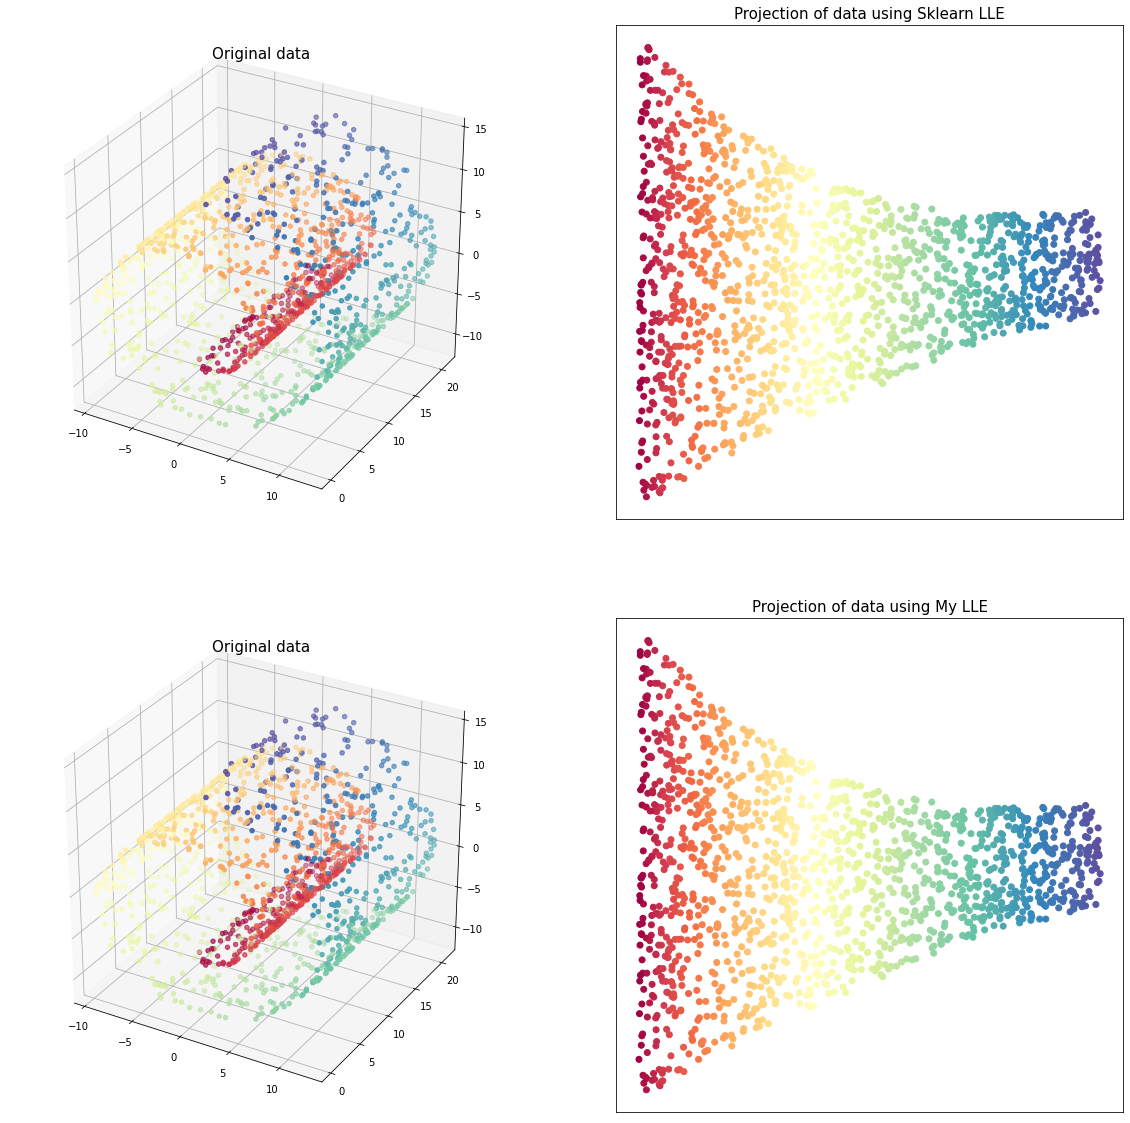

In [3]:
# create data
raw_samples, samples_color = datasets.make_swiss_roll(n_samples=1500, random_state=1000)

# LLE, using sklearn
sklearn_lle, _ = manifold.locally_linear_embedding(raw_samples, n_neighbors=20, n_components=2)

# My LLE
my_lle = MyLLE(raw_samples, 2, 20)
my_lle_result = my_lle()

# ----------------------
# draw func
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(221, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(222)
plt.xticks([])
plt.yticks([])
plt.title("Projection of data using Sklearn LLE", fontsize=15)
ax.scatter(sklearn_lle[:, 0], sklearn_lle[:, 1], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(223, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(224)
plt.xticks([])
plt.yticks([])
plt.title("Projection of data using My LLE", fontsize=15)
ax.scatter(my_lle_result[:, 0], my_lle_result[:, 1], c=samples_color, cmap=plt.cm.Spectral)

plt.show()